In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('Mumbai1.csv')
df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

In [4]:
df.head()

,ID,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [5]:
df_norm = df.copy()

## Проверка на наличие нетипичных значений в стоблцах

In [6]:
df_norm["Location"].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [7]:
df_norm["No. of Bedrooms"].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [8]:
df_norm["New/Resale"].unique()

array([0, 1], dtype=int64)

In [9]:
df_norm["Gymnasium"].unique()

array([0, 1], dtype=int64)

In [10]:
df_norm["Lift Available"].unique()

array([1, 0], dtype=int64)

In [11]:
df_norm["Car Parking"].unique()

array([1, 0], dtype=int64)

In [12]:
df_norm["Maintenance Staff"].unique()

array([1, 0], dtype=int64)

In [13]:
df_norm["24x7 Security"].unique()

array([1, 0], dtype=int64)

In [14]:
df_norm["Children's Play Area"].unique()

array([0, 1], dtype=int64)

In [15]:
df_norm["Clubhouse"].unique()

array([0, 1], dtype=int64)

In [16]:
df_norm["Intercom"].unique()

array([0, 1], dtype=int64)

In [17]:
df_norm["Landscaped Gardens"].unique()

array([0, 1], dtype=int64)

In [18]:
df_norm["Indoor Games"].unique()

array([0, 1], dtype=int64)

In [19]:
df_norm["Gas Connection"].unique()

array([0, 1], dtype=int64)

In [20]:
df_norm["Jogging Track"].unique()

array([0, 1], dtype=int64)

In [21]:
df_norm["Swimming Pool"].unique()

array([0, 1], dtype=int64)

## Проверка наличия пустых значений в стобцах

In [22]:
cols = list(df.columns)
cols

['ID',
 'Price',
 'Area',
 'Location',
 'No. of Bedrooms',
 'New/Resale',
 'Gymnasium',
 'Lift Available',
 'Car Parking',
 'Maintenance Staff',
 '24x7 Security',
 "Children's Play Area",
 'Clubhouse',
 'Intercom',
 'Landscaped Gardens',
 'Indoor Games',
 'Gas Connection',
 'Jogging Track',
 'Swimming Pool']

In [23]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'ID': 0,
 'Price': 0,
 'Area': 0,
 'Location': 0,
 'No. of Bedrooms': 0,
 'New/Resale': 0,
 'Gymnasium': 0,
 'Lift Available': 0,
 'Car Parking': 0,
 'Maintenance Staff': 0,
 '24x7 Security': 0,
 "Children's Play Area": 0,
 'Clubhouse': 0,
 'Intercom': 0,
 'Landscaped Gardens': 0,
 'Indoor Games': 0,
 'Gas Connection': 0,
 'Jogging Track': 0,
 'Swimming Pool': 0}

In [30]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

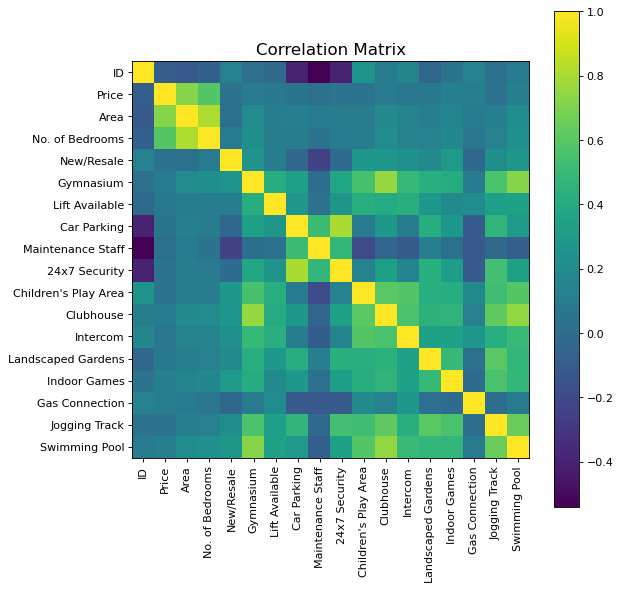

In [31]:
plotCorrelationMatrix(df_norm, 8)